# Assignment 3

This assignment uses the weather data from Lab 1, from [https://github.com/fivethirtyeight/data/tree/master/us-weather-history](https://github.com/fivethirtyeight/data/tree/master/us-weather-history).  We used the KNYC.csv in Lab 1, and will also use KCLT.csv, which is the weather data for Charlotte, NC, in this assignment.

This assignment will look at different ways to predict the actual maximum daily temperature in New York using linear regression.  The actual maximum temperature was the maximum temperature recorded on that day.

1. Predicting the NYC actual max temperature from the NYC average max temperature:
    
    a. Use regplot from Seaborn to create a scatter plot of the average max temperature (on x axis) vs. the actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?
    
    b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature.  What is the equation for the linear model?  What proportion of the variance is explained by the model (R-squared)?
    
    c. Plot a histogram of the residuals of your model from part b.  Describe their distribution.  Based on this and your results from parts a and b, do you think this linear model is a good fit?  Why or why not?
    
2. Predicting the NYC actual max temperature from the Charlotte actual max temperature:
    Note:  To easily perform the following analysis, add the column of actual max temperatures from the Charlotte weather data to your NYC weather dataframe.  
    ex.  `nyc_weather_df["name_of_new_column"] = charlotte_weather_df["actual_max_temp"]`
    
    a. Use regplot from Seaborn to create a scatter plot of the Charlotte actual max temperature (on x axis) vs. the NYC actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?
    
    b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature.  What proportion of the variance is explained by the model?
    
    c. Predict the NYC actual max temperature if the Charlotte max temperature is 32F, 60F, and 80F.
    
    d. Plot a histogram of the residuals of your model from part b.  Describe their distribution.
    
    e. Make a scatter plot of the NYC actual max temperaturs (x axis) vs. the residuals from your linear model.  If you are using `plt.scatter()` you can add a horizontal line to your plot at 0 with the code `plt.axhline(0)`.  What do you notice about how the residuals are distributed above and below this line?  What tempertures will be overestimated by this model?  What temperatures will be underestimated by this model?
    
    f. Based on the previous parts, do you think this linear model is a good fit?
    
3. Predicting the NYC actual max temperature from both the average max temperature and the Charlotte actual max temperature:
    a. Compute a linear regression model with both the average max temperature and the Charlotte actual max temperature as the independent variables.  What proportion of variance is explained by this model?
    
    b. Plot a histogram of the residuals. Describe their distribution.
    
    c. Make a scatter plot of the NYC actual max temperatures (x axis) and the fitted NYC actual max temperatures (y axis).  What do you notice about the plot?

In [18]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

1. Predicting the NYC actual max temperature from the NYC average max temperature:
    
    a. Use regplot from Seaborn to create a scatter plot of the average max temperature (on x axis) vs. the actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?
    
    b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature.  What is the equation for the linear model?  What proportion of the variance is explained by the model (R-squared)?
    
    c. Plot a histogram of the residuals of your model from part b.  Describe their distribution.  Based on this and your results from parts a and b, do you think this linear model is a good fit?  Why or why not?

In [4]:
kclt = pd.read_csv("KCLT.txt")
kclt.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


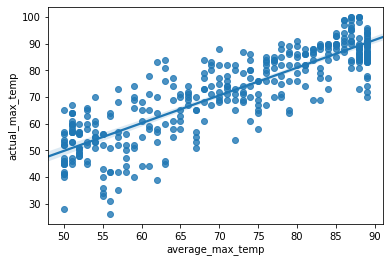

In [5]:
sns.regplot(x = "average_max_temp", y = "actual_max_temp", data = kclt, fit_reg = True)
# I believe that there is a linear relationship between average maximum temperature and actual maximum temperature

In [9]:
lm = smf.ols("actual_max_temp ~ average_max_temp", data = kclt).fit()

In [10]:
lm.summary()
# EQUATION: actual_max_temp = -2.3461 + (1.0422 * average_max_temp)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     986.0
Date:                Fri, 04 Oct 2019   Prob (F-statistic):          1.63e-105
Time:                        12:57:28   Log-Likelihood:                -1300.0
No. Observations:                 365   AIC:                             2604.
Df Residuals:                     363   BIC:                             2612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.3461      2.398     -0.978      0.329      -7.062       2.369
average_max_temp     1.0422      0.033     31.401      0.000       0.977       1.107
==============================================================================
Omnibus:                       16.405   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.335
Skew:                          -0.508   Prob(JB):                     0.000172
Kurtosis:                       3.330   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
lm.rsquared
# 73.09% of the variation of actual maximum temperature is explained by the model

0.7309217082584452

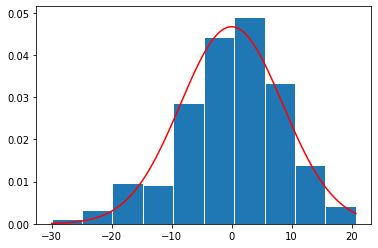

In [23]:
lm.resid.hist(density = True, grid = False, edgecolor = "white")
x = np.linspace(lm.resid.min(), lm.resid.max(), 200)
y = stats.norm.pdf(x, loc = lm.resid.mean(), scale = lm.resid.std())
plt.plot(x,y, color = "r")
# The residuals resemble a normal distribution. 

# Based on the fact that there is a linear relationship present between actual maximum temperature and average maximum 
# temperature, 73% of the variation of the actual maximum temperature is explained by the model, and 
# the facts that the residuals appear to be normally distributed I believe that the linear model is a good fit for the data.

2. Predicting the NYC actual max temperature from the Charlotte actual max temperature:
    Note:  To easily perform the following analysis, add the column of actual max temperatures from the Charlotte weather data to your NYC weather dataframe.  
    ex.  `nyc_weather_df["name_of_new_column"] = charlotte_weather_df["actual_max_temp"]`
    
    a. Use regplot from Seaborn to create a scatter plot of the Charlotte actual max temperature (on x axis) vs. the NYC actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?
    
    b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature.  What proportion of the variance is explained by the model?
    
    c. Predict the NYC actual max temperature if the Charlotte max temperature is 32F, 60F, and 80F.
    
    d. Plot a histogram of the residuals of your model from part b.  Describe their distribution.
    
    e. Make a scatter plot of the NYC actual max temperaturs (x axis) vs. the residuals from your linear model.  If you are using `plt.scatter()` you can add a horizontal line to your plot at 0 with the code `plt.axhline(0)`.  What do you notice about how the residuals are distributed above and below this line?  What tempertures will be overestimated by this model?  What temperatures will be underestimated by this model?
    
    f. Based on the previous parts, do you think this linear model is a good fit?

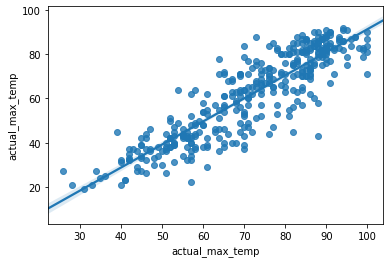

In [26]:
knyc = pd.read_csv("KNYC.txt")
sns.regplot(x = kclt["actual_max_temp"], y = knyc["actual_max_temp"], fit_reg = True)
# the data appears to have a linear relationship

In [29]:
kclt["nyc_actual_max_temp"] = knyc["actual_max_temp"]
lm2 = smf.ols("nyc_actual_max_temp ~ actual_max_temp", data = kclt).fit()
lm2.rsquared
# 78.14% of NYC's actual maximum temperature is explained by Charlotte's actual maximum temperature.

0.781457709888749

In [44]:
temp_values = pd.DataFrame({"actual_max_temp" : [32, 60, 80]})
predictions = lm2.predict(temp_values)

temp_values["predictions"] = predictions
temp_values

,actual_max_temp,predictions
0,32,20.319817
1,60,49.580479
2,80,70.480951


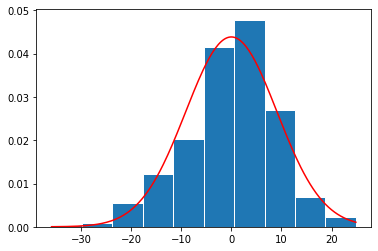

In [50]:
lm2.resid.hist(density = True, edgecolor = "white", grid = False)
x = np.linspace(lm2.resid.min(), lm2.resid.max(), 200)
y = stats.norm.pdf(x, loc = lm2.resid.mean(), scale = lm2.resid.std())
plt.plot(x, y, color = "r")

# the residuals of this model appear to be normally distributed

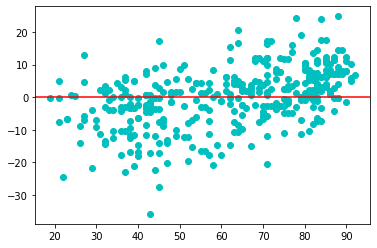

In [57]:
plt.scatter(knyc["actual_max_temp"], lm2.resid, color = 'c')
plt.axhline(0, color = 'r')

# for lower temperatures the model tends to underestimate the temperatures
# and for higher temepratures the model tends to overestimate the temeperatures

In [59]:
# I believe this model is a good fit for the data. The data we're analyzing has a linear relationship, the residuals of 
# the model resemble a normal distribution, the majority of the residuals are centered extremely close to 0
lm2.resid.mean()

-5.100334158058802e-15

3. Predicting the NYC actual max temperature from both the average max temperature and the Charlotte actual max temperature:
    a. Compute a linear regression model with both the average max temperature and the Charlotte actual max temperature as the independent variables.  What proportion of variance is explained by this model?
    
    b. Plot a histogram of the residuals. Describe their distribution.
    
    c. Make a scatter plot of the NYC actual max temperatures (x axis) and the fitted NYC actual max temperatures (y axis).  What do you notice about the plot?

In [63]:
kclt["nyc_average_max_temp"] = knyc["average_max_temp"]

lm3 = smf.ols("nyc_actual_max_temp ~ nyc_average_max_temp + actual_max_temp", data = kclt).fit()
lm3.rsquared
# 87.41% of the variance in NYC's actual maximum temperatures is explained by the model

0.8741468427789747

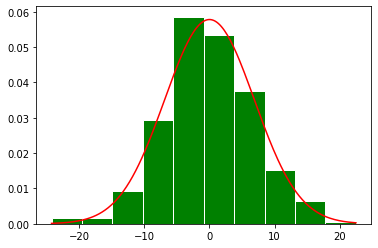

In [71]:
lm3.resid.hist(density = True, edgecolor = "white", grid = False, color = 'g')

x = np.linspace(lm3.resid.min(), lm3.resid.max(), 200)
y = stats.norm.pdf(x, lm3.resid.mean(), lm3.resid.std())
plt.plot(x, y, color = "r")

# the residuals of the model resemble a normal distribution

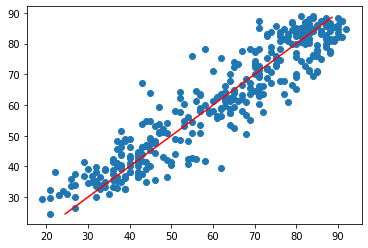

In [82]:
predictions3 = lm3.predict(kclt)
predictions3

x = np.arange(predictions3.min(), predictions3.max())
y = x
plt.scatter(kclt["nyc_actual_max_temp"], predictions3)
plt.plot(x, y, color = "r")

# The plot is relatively centered around the line y = x, which means that the model's predictions are relatively 
# close to NYC's actual max temperatures 